Let’s write a function diff(f, x, dx = 1.0e-6) that returns the approximation of the derivative of a mathematical function represented by a Python function f(x).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def diff(f,x,dx=1e-6):
    numerator = f(x + dx) - f(x - dx)
    derivative = numerator / (2.* dx)
    return derivative

Let’s apply the above formula to differentiate f(x)=ex at x=0, f(x)=e−2x at x=0, f(x)=cos(x) at x=2π, and f(x)=ln(x) at x=1.

In each case, using Δx=0.01, let’s write out the error, i.e. the difference between the exact derivative and the result of the formula above.

In [5]:
dx = 0.01
x = 0
f = np.exp
derivative = diff(f,x,dx)
print("The approximate derivative of exp(x) at x = 0 is: %f. The error is %f." % (derivative, abs(derivative -1 )))

x=0
def g(x):
    return np.exp(-2*x)
derivative = diff(g,x,dx)
print("The approximate derivative of exp(-2x) at x = 0 is: %f. The error is %f."%(derivative,abs(derivative -(-2.) )))

x = 2*np.pi
f = np.cos
derivative = diff(f,x,dx)
print("The approximate derivative of cos(x) at x = 2*pi is: %f. The error is  %f."%(derivative,abs(derivative -0 )))

x = 1
f = np.log
derivative = diff(f,x,dx)
print("The approximate derivative of cos(x) at x = 2*pi is: %f. The error is  %f."%(derivative,abs(derivative -1 )))

The approximate derivative of exp(x) at x = 0 is: 1.000017. The error is 0.000017.
The approximate derivative of exp(-2x) at x = 0 is: -2.000133. The error is 0.000133.
The approximate derivative of cos(x) at x = 2*pi is: 0.000000. The error is  0.000000.
The approximate derivative of cos(x) at x = 2*pi is: 1.000033. The error is  0.000033.


In [6]:
def forward_diff(f,x,dx):
    fx = f(x)
    fxph = f(x + dx)
    return (fxph - fx) / dx

def central_diff(f,x,dx):
    fxph = f(x + dx)
    fxbh = f(x - dx)
    return (fxph - fxbh) / (2*dx)
    

In [7]:
exact = np.cos(0.8)
print("exact derivative at sin(0.8) = %.5f."%exact)


exact derivative at sin(0.8) = 0.69671.


In [9]:
print('%20s%40s' %("forward differencing","central differencing"))
fd_error = []
cd_error = []
dx_all = []
dx = 1.0

for i in range(10):
    fd = forward_diff(np.sin, 0.8, dx)
    cd = central_diff(np.sin, 0.8, dx)
    print("%10g (error=%10.2g)    %10g (error=%10.2g)" % 
            (fd,abs(fd - exact), cd, abs(cd - exact)))
    dx_all.append(dx)
    fd_error.append(abs(fd - exact))
    cd_error.append(abs(cd - exact))
    dx = dx / 2


forward differencing                    central differencing
  0.256492 (error=      0.44)      0.586258 (error=      0.11)
  0.492404 (error=       0.2)      0.668038 (error=     0.029)
  0.600269 (error=     0.096)      0.689472 (error=    0.0072)
  0.650117 (error=     0.047)      0.694894 (error=    0.0018)
  0.673843 (error=     0.023)      0.696253 (error=   0.00045)
  0.685386 (error=     0.011)      0.696593 (error=   0.00011)
  0.691074 (error=    0.0056)      0.696678 (error=   2.8e-05)
  0.693897 (error=    0.0028)        0.6967 (error=   7.1e-06)
  0.695304 (error=    0.0014)      0.696705 (error=   1.8e-06)
  0.696006 (error=    0.0007)      0.696706 (error=   4.4e-07)


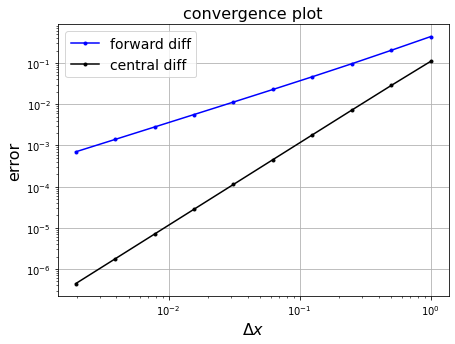

In [11]:
fig = plt.figure(figsize=(7,5))
ax1 = plt.subplot(111)

ax1.loglog(dx_all, fd_error, "b.-", label = "forward diff" )
ax1.loglog(dx_all, cd_error, "k.-", label="central diff")
ax1.set_xlabel("$\Delta x$", fontsize=16)
ax1.set_ylabel("error", fontsize=16)
ax1.set_title("convergence plot",fontsize=16)
ax1.grid(True)
ax1.legend(loc='best',fontsize=14)
plt.show()